In [12]:
from config import *
from BS_model import UNet
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import os
from random import randint

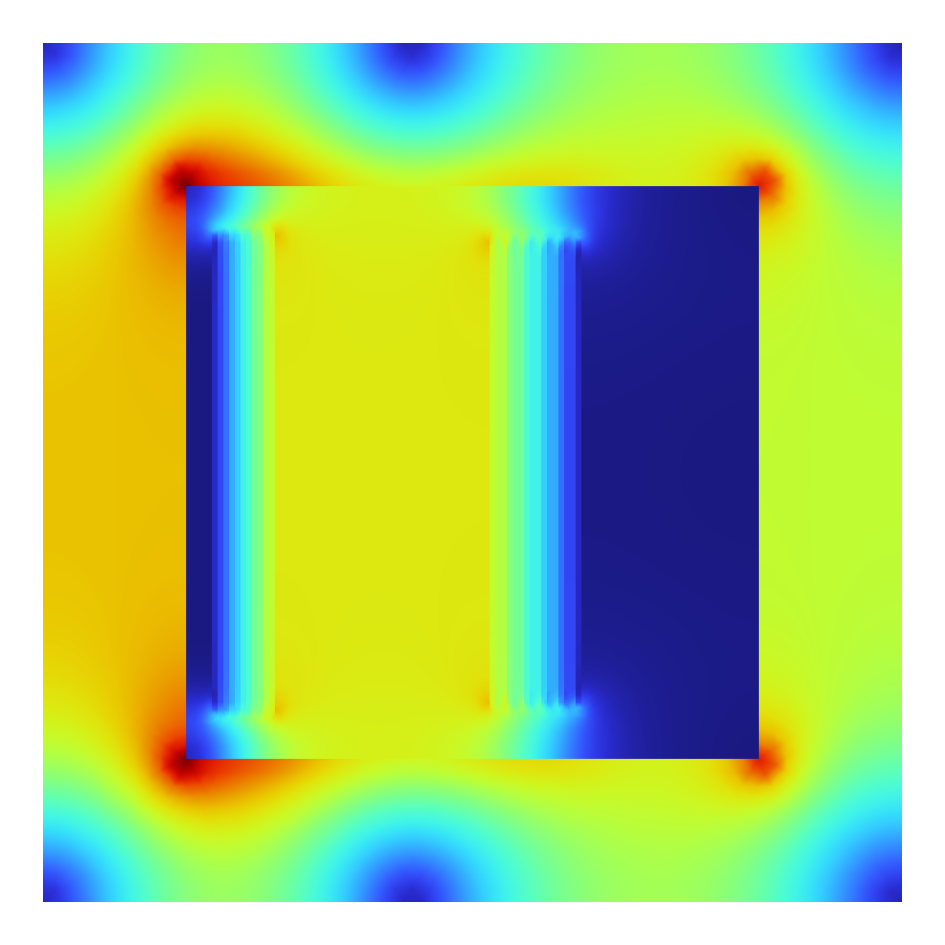

In [13]:
i = randint(0,1000)
input_image = Image.open(os.path.join(IMAGE_DATASET_PATH, f"{i}.png"))
input_image

In [14]:
input_image_tensor = transforms.ToTensor()(input_image)
input_image_tensor = transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))(input_image_tensor)
input_image_tensor = input_image_tensor.unsqueeze(dim=0)
input_image_tensor.shape

torch.Size([1, 3, 128, 128])

In [15]:
model = UNet()
model.load_state_dict(torch.load(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\binarysegmentation\models\Binarysegmentation_150_128.pth"))
model.eval()

UNet(
  (encoder): Encoder(
    (encBlocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Block(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (2): Block(
        (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (3): Block(
        (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (4): Block(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), 

In [16]:
output_image_tensor = model(input_image_tensor).squeeze()
output_image_tensor.shape

torch.Size([128, 128])

In [17]:
output_image_tensor = torch.sigmoid(output_image_tensor)
output_image = output_image_tensor.cpu().detach().numpy()
output_image = (output_image > THRESHOLD)*255
output_image = output_image.astype(np.uint8)

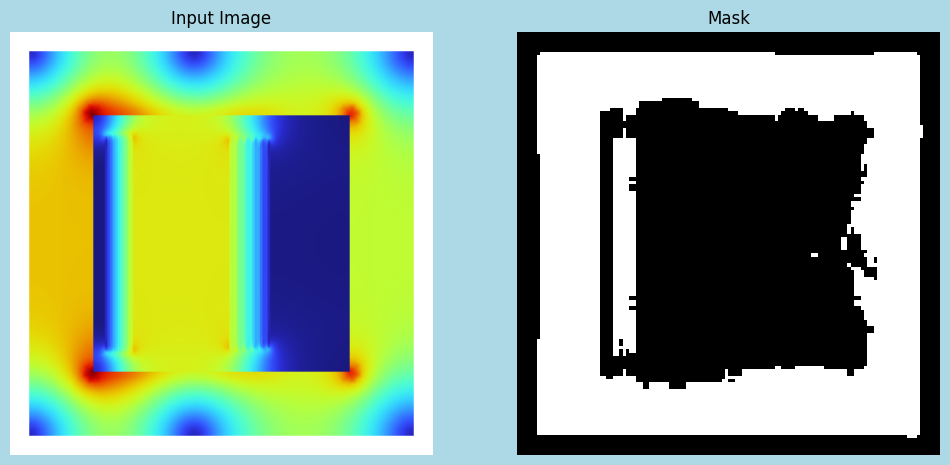

In [18]:
plt.figure(figsize=(12,6), facecolor="lightblue")
plt.subplot(1,2,1)
plt.imshow(input_image)
plt.title("Input Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(output_image, cmap="gray")
plt.title("Mask")
plt.axis("off")
plt.savefig("output_150_128.png")
plt.show()
